<a href="https://colab.research.google.com/github/abdullahArshadCheema/Artifical_Neural_Network_Model/blob/main/Face_Liveness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset from Google drive to Workspace

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Copying zipfile into workspace**

In [2]:
!cp -r "/content/drive/MyDrive/Face Antispoofing System/Datasets/final_antispoofing.zip" "/content"

In [3]:
import zipfile
archieve = zipfile.ZipFile("/content/final_antispoofing.zip")
archieve.extractall("/content")

# **Data Preprocessing**

# Four Steps
## Step 1: Create a new directory structure
## Step 2: Copy dataset into newly created structure
## Step 3: Perform Data exploration
## Step 4: Perform Data Visualization

# Step 1

## Original Vs. New Directory Structure

In [ ]:
from IPython import display
print("Original vs New Dataset Structure")
display.Image("Original vs New_dataset.png")

In [5]:
# storing path of various previous file to variables
dataset_dir = "/content/final_antispoofing"
train_dataset_dir = "/content/final_antispoofing/train"
test_dataset_dir = "/content/final_antispoofing/test"



In [6]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [7]:
# path of new dataset directory
train_dir = '/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

# Step 2

In [8]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory, split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category =  os.path.join(path_to_split_type, category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category, subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject, img), os.path.join(train_dir, category, img))
          else:
            shutil.copy(os.path.join(path_to_subject, img), os.path.join(test_dir, category, img))


train_test_splits(data_directory=dataset_dir)


# Step 3
## Data Exploration

In [10]:
categories = ['real', 'spoof']

In [11]:
print('---------------------Exploring Training Datasets--------------------')
for category in categories:
  category_path = os.path.join(train_dir, category)
  if category == 'real':
    r1 = len(os.listdir(category_path))
  else:
    s1 = len(os.listdir(category_path))

  print("There are {} images in {} directory".format(len(os.listdir(category_path)), category))
print("There are {} total image in training directory".format(r1+s1))

print('--------------------Exploring Testing Datasets-----------------------')
for category in categories:
  category_path = os.path.join(test_dir, category)
  if category == 'real':
    r2 = len(os.listdir(category_path))
  else: 
    s2 = len(os.listdir(category_path))

  print("There are {} images in {} directory".format(len(os.listdir(category_path)), category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total image in training directory
--------------------Exploring Testing Datasets-----------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


# Step 4
## Data Visualization

In [12]:
def get_image(data_dir, number_of_samples):
  sample_images = []
  for category in categories:
    path = os.path.join(data_dir, category)
    i = 0
    for img in os.listdir(path):
      if i >= number_of_samples:  # required samples collected stop the loop
        break
      else:   
        sample_images.append(os.path.join(path, img))
        i += 1
      
  return sample_images
    

In [13]:
def visualize_dataset(sample_images, rows, cols):
  fig = plt.figure(figsize=(20, 20))
  for i in range(1, rows * cols + 1):
    fig.add_subplot(rows, cols, i)
    img_array = cv2.imread(sample_images[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.xlabel(sample_images[i-1].split('/')[-2])
  plt.show()

In [14]:
training_sample_images = get_image(data_dir=train_dir, number_of_samples=25)
print(training_sample_images)
print(len(training_sample_images))


['/content/antispoofing_dataset/train/real/Sunil Koirala6.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_23_05_Prohr_flipbrightness0.76.jpg', '/content/antispoofing_dataset/train/real/Saurav Ale43.jpg', '/content/antispoofing_dataset/train/real/kjdfjsdkfj25.jpg', '/content/antispoofing_dataset/train/real/received_663513861195964.jpg', '/content/antispoofing_dataset/train/real/Shikshya Gautam21hr_flipbrightness1.36.jpg', '/content/antispoofing_dataset/train/real/Rijan Ale38.jpg', '/content/antispoofing_dataset/train/real/dddd33.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala28.jpg', '/content/antispoofing_dataset/train/real/Samir Gurung30.jpg', '/content/antispoofing_dataset/train/real/Samir tamang41.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala9hr_flip.jpg', '/content/antispoofing_dataset/train/real/Sumit tamang29.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_10_08_12_Prohr_flip.jpg', '/content/antispoofing_dataset/train/rea

# Training Data Samples Visualization

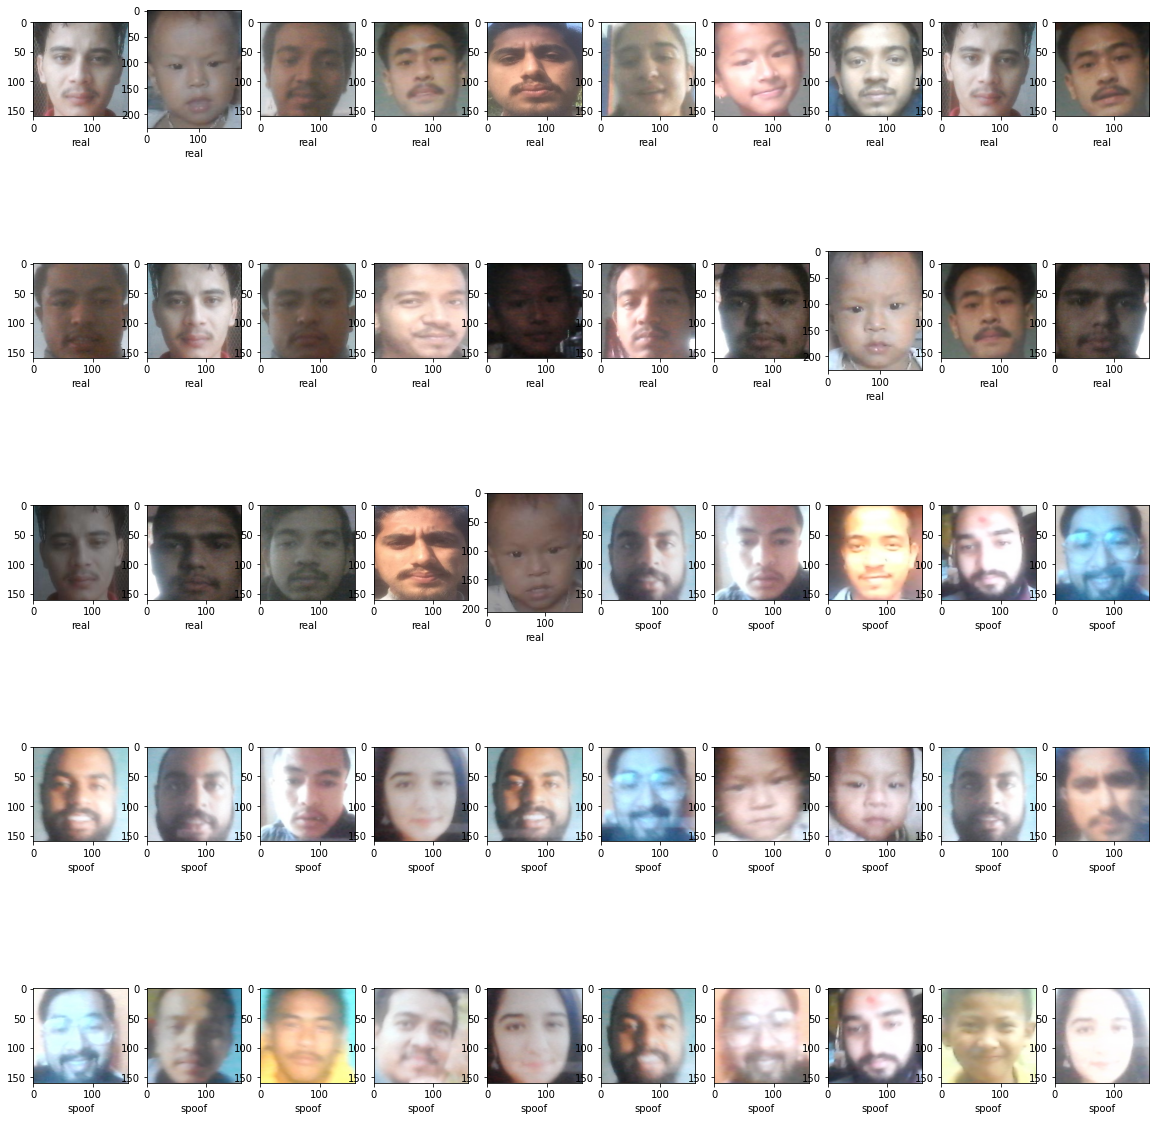

In [15]:
visualize_dataset(sample_images=training_sample_images, rows=5, cols=10)

# Testing Data Samples Visualization

In [16]:
testing_sample_images = get_image(data_dir=test_dir, number_of_samples=25)
print(testing_sample_images)
print(len(testing_sample_images))

['/content/antispoofing_dataset/test/real/Shikshya Gautam38.jpg', '/content/antispoofing_dataset/test/real/WIN_20201119_10_49_22_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/hehehe21.jpg', '/content/antispoofing_dataset/test/real/Suraj Khanal19brightness1.25.jpg', '/content/antispoofing_dataset/test/real/20201110_113245.jpg', '/content/antispoofing_dataset/test/real/kjdfjsdkfj31.jpg', '/content/antispoofing_dataset/test/real/ghjknhgj14.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_08_25_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi3.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_11_19_Probrightness1.28.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi4brightness0.72.jpg', '/content/antispoofing_dataset/test/real/dfjsdfjk34.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi49.jpg', '/content/antispoofing_dataset/test/real/Prabhat Ale16.jpg', '/content/antispoofing_dataset/test/real/hehehe8.jpg',

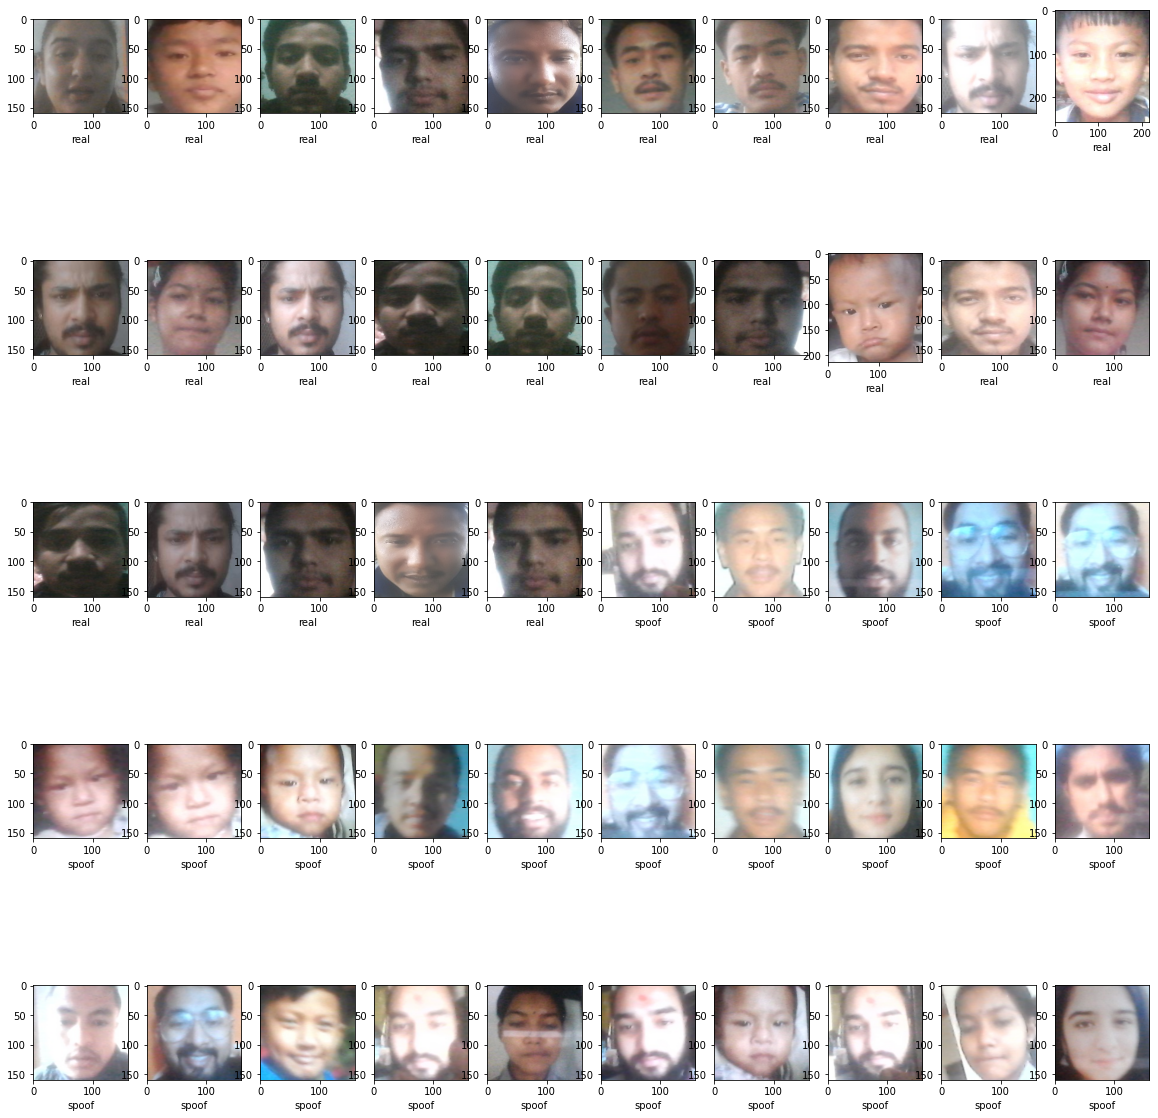

In [17]:
visualize_dataset(sample_images=testing_sample_images, rows=5, cols=10)

# Model Creation

**Steps in Model Preparation**
1. Choose framework and import neccessary libraries
2. Load Datasets and perform image augumentations
3. Model Selection
4. Compiling the model
5. Setting model checkpoints

**Step 1: Keras Framework**

In [18]:
from keras.layers import Dense, Dropout, Input, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json 

**Step 2: Load & Augumentation**

In [19]:
train_data_generation = ImageDataGenerator(brightness_range=(0.8, 1.2), 
                                           rotation_range=30, 
                                           width_shift_range=0.2, height_shift_range=0.2,
                                           fill_mode='nearest', shear_range=0.2,
                                           zoom_range=0.3, 
                                           rescale=1./255)

valid_data_generation = ImageDataGenerator(rescale=1./255)  # rescale for gradient descent

In [21]:
train_generator = train_data_generation.flow_from_directory(train_dir, target_size=(160, 160), color_mode='rgb',
                                                            class_mode='binary', batch_size=25, shuffle=True)

Found 4220 images belonging to 2 classes.


In [22]:
valid_generator = valid_data_generation.flow_from_directory(test_dir, target_size=(160, 160), color_mode='rgb',
                                                           class_mode='binary', batch_size=25)

Found 951 images belonging to 2 classes.


**Step 3: Model Selection & Transfer Learning**

In [23]:
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(160, 160, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [24]:
mobilenet.trainable = False

In [25]:
output =  Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units=8, activation='relu')(output)
prediction = Dense(1, activation='sigmoid')(output)

In [26]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

**Step 4: Compiling the models**

In [27]:
# tell the model what cost and optimization method to use
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    metrics=['accuracy']
)

**Step 5: Setting Model checkpoints**

In [29]:
import os 
os.mkdir('/content/drive/MyDrive/Face Antispoofing System/model_weights/')

In [31]:
model_checkpoint = ModelCheckpoint('./drive/MyDrive/Face Antispoofing System/model_weights/liveness_detection_model_{epoch:02d}-{val_accuracy:.6f}.h5', 
                                   monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)


In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks = [model_checkpoint]
)

<ipython-input-33-b3a7b419a62e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
168/168 [==============================] - ETA: 0s - loss: 0.8346 - accuracy: 0.5485
Epoch 1: val_loss improved from inf to 0.69907, saving model to ./drive/MyDrive/Face Antispoofing System/model_weights/liveness_detection_model_01-0.607368.h5
168/168 [==============================] - 130s 754ms/step - loss: 0.8346 - accuracy: 0.5485 - val_loss: 0.6991 - val_accuracy: 0.6074
Epoch 2/100
168/168 [==============================] - ETA: 0s - loss: 0.7756 - accuracy: 0.5673
Epoch 2: val_loss improved from 0.69907 to 0.61771, saving model to ./drive/MyDrive/Face Antispoofing System/model_weights/liveness_detection_model_02-0.676842.h5
168/168 [==============================] - 124s 741ms/step - loss: 0.7756 - accuracy: 0.5673 - val_loss: 0.6177 - val_accuracy: 0.6768
Epoch 3/100
168/168 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.6141
Epoch 3: val_loss improved from 0.61771 to 0.56002, saving model to ./drive/MyDrive/Face Antispoofing System/model_we

In [34]:
# Serialize model to JSON
model_json = model.to_json()
with open("liveness_detection_mobilenet_model.json", 'w') as json_file:
  json_file.write(model_json)

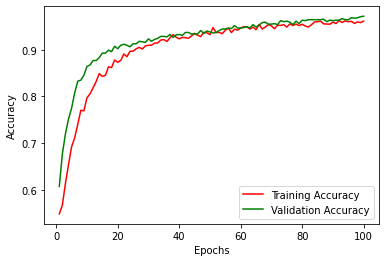

In [38]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, 101)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'g', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

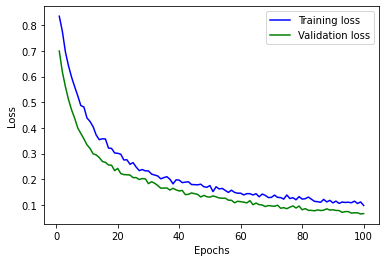

In [39]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
from keras.utils import load_img, img_to_array
import numpy as np

def check_fakes(path, category_type):
  predictor = {}
  path = os.path.join(path, category_type)
  for img in os.listdir(path):
    try:
      img = load_img(os.path.join(path,img), target_size=(160, 160))
      img = img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else: 
        prediction_class = 0 
      
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1

    except Exception as e:
      pass

  return predictor


In [68]:
check_fakes(test_dir, categories[0])

1/1 [==============================] - 0s 42ms/step


{'real': 476, 'spoof': 1}

In [69]:
check_fakes(test_dir, categories[1])

1/1 [==============================] - 0s 69ms/step


{'spoof': 448, 'real': 26}